In [1]:
import numpy as np

X = ['Tiger Left', 'Tiger Right']

A = ['Open Left', 'Open Right', 'Listen']

Z = ['Tiger Left', 'Tiger Right']

P_OL = np.ones([len(X), len(X)])/len(X) # uniform probability of tiger being behind any door
P_OR = P_OL
P_L = np.eye(len(X)) # when listening position of tiger doesn't change

O_OL = np.ones([len(X), len(X)])/len(X) # when door is opened world resets, back to tiger behind any door with uniform probability
O_OR = O_OL
O_L = np.array([[0.85, 0.15], [0.15, 0.85]]) # We can hear correct position of tiger with 0.85 probability

P = np.array([P_OL, P_OR, P_L])
O = np.array([O_OL, O_OR, O_L])

C = np.array([[1, 0, 0.1], [0, 1, 0.1]]) # Maximum cost if we pick wrong door, small cost for listening

In [2]:
p = np.linspace(0,1,10001)
p = np.reshape(p, [p.size, 1])

B = np.hstack((p, 1-p)) # discrete belief space

In [3]:
def FIB(B, P, O, c, gamma):
    
    c = c.T.reshape([C.shape[1], C.shape[0], 1])
    pi = np.ones(c.shape)/c.shape[0]
    pi_prev = np.ones(c.shape)
    
    k = 0
    
    Q = np.zeros([*c.shape])
    
    while not np.allclose(pi,pi_prev):
        
        pi_prev = pi
        for a in range(Q.shape[0]):
            
            sum_over_z = np.zeros([*c[0].shape])
            
            for z in range(O[0].shape[1]):
                
                O_az = O[a][:,z].reshape([2,1])
                aux = P[a]@(O_az*Q)
                aux = np.min(aux, axis = 0)
                sum_over_z += aux
            
            Q[a] = c[a] + gamma*sum_over_z 
            
        Q_test = Q.T.reshape([2,3])

        pi = np.argmin(B@Q_test, axis = 1)
              
        k += 1

    print(k)
    
    return pi

In [4]:
def Q_MDP(B, P, c, gamma):
    
    c = c.T.reshape([c.shape[1], c.shape[0], 1])
    
    pi = np.ones(c.shape)/c.shape[0]
    pi_prev = np.ones(c.shape)
    
    k = 0
    
    while not np.allclose(pi,pi_prev):
        
        pi_prev = pi
        
        P_pi = np.sum(P*pi, axis = 0)
        c_pi = np.sum(c*pi, axis = 0)
        
        J = np.matmul(np.linalg.inv(np.eye(P_pi.shape[0]) - gamma*P_pi), c_pi)
        
        Q = c + gamma * np.matmul(P,J)
        
        pi = np.isclose(Q, np.min(Q,axis = 0)).astype(int)

        pi = pi/np.sum(pi, axis = 0)
        
        k += 1
        

    Q = Q.T.reshape([2,3])
    
    pi = np.argmin(B@Q, axis = 1)
        
    print(k)
    
    return pi

In [5]:
def MLS(B, P, c, gamma):
    
    c = c.T.reshape([c.shape[1], c.shape[0], 1])
    
    pi = np.ones(c.shape)/c.shape[0]
    pi_prev = np.ones(c.shape)
    
    k = 0
    
    while not np.allclose(pi,pi_prev):
        
        pi_prev = pi
        
        P_pi = np.sum(P*pi, axis = 0)
        c_pi = np.sum(c*pi, axis = 0)
        
        J = np.matmul(np.linalg.inv(np.eye(P_pi.shape[0]) - gamma*P_pi), c_pi)
        
        Q = c + gamma * np.matmul(P,J)
        
        pi = np.isclose(Q, np.min(Q,axis = 0)).astype(int)

        pi = pi/np.sum(pi, axis = 0)
        
        k += 1
        
        
    pi = np.concatenate(pi, axis = 1)
    
    MLS = np.argmax(B, axis = 1)
    
    pi_MLS = np.zeros([MLS.size, pi.shape[1]])
    i = 0

    for x in MLS:
        pi_MLS[i] = pi[x,:]
        i+=1

    print(k)
    
    return np.argmax(pi_MLS, axis = 1)

In [6]:
def AV(B, P, c, gamma):
    
    c = c.T.reshape([c.shape[1], c.shape[0], 1])
    
    pi = np.ones(c.shape)/c.shape[0]
    pi_prev = np.ones(c.shape)
    
    k = 0
    
    while not np.allclose(pi,pi_prev):
        
        pi_prev = pi
        
        P_pi = np.sum(P*pi, axis = 0)
        c_pi = np.sum(c*pi, axis = 0)
        
        J = np.matmul(np.linalg.inv(np.eye(P_pi.shape[0]) - gamma*P_pi), c_pi)
        
        Q = c + gamma * np.matmul(P,J)
        
        pi = np.isclose(Q, np.min(Q,axis = 0)).astype(int)

        pi = pi/np.sum(pi, axis = 0)
        
        k += 1
        
        
    pi = np.concatenate(pi, axis = 1)
    
    pi = np.argmax(B@pi, axis = 1)

    print(k)
    
    return pi

2
12


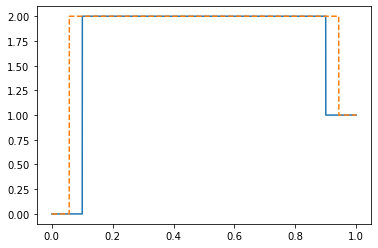

In [7]:
import matplotlib.pyplot as plt

pi_QMDP = Q_MDP(B,P,C,0.75)
pi_FIB = FIB(B, P, O, C, 0.75)

plt.plot(p,pi_QMDP)

plt.plot(p,pi_FIB, '--')